# Helper Functions

In [ ]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [2]:
jpg_paths_dict.keys()

dict_keys(['Purple_Blotch', 'Thrips', 'IYSV', 'Twister', 'Healthy', 'Bulb Rot', 'Basal_Rot', 'Stemphylium', 'Anthracnose'])

In [3]:
import imagehash
from PIL import Image
from tqdm import tqdm


In [ ]:
def get_hashes(image_paths):

    hashes = {}
    for path in tqdm(image_paths, desc="Hashing images"):
        try:
            img = Image.open(path).convert('RGB')
            hashes[path] = imagehash.phash(img)
        except Exception as e:
            print(f"Error processing {path}: {e}")
    return hashes


In [ ]:
def find_similar_images(hashes1, hashes2, threshold=5):

    matches = []
    for path1, hash1 in tqdm(hashes1.items(), desc="Comparing hashes"):
        for path2, hash2 in hashes2.items():
            distance = hash1 - hash2 
            if distance <= threshold:
                matches.append((path1, path2, distance))
    return matches


In [ ]:


anthracnose_paths = jpg_paths_dict.get('Anthracnose', [])
twister_paths = jpg_paths_dict.get('Twister', [])

print("Hashing Anthracnose images...")
anthracnose_hashes = get_hashes(anthracnose_paths)

print("Hashing Twister images...")
twister_hashes = get_hashes(twister_paths)

print("Comparing images for similarity...")
threshold = 5  
matches = find_similar_images(twister_hashes, anthracnose_hashes, threshold)

print(f"\nFound {len(matches)} similar image pairs between Twister and Anthracnose\n")

for i, (twister_path, anthracnose_path, dist) in enumerate(matches[:10]):
    print(f"Match {i+1}:")
    print(f"  Twister: {twister_path}")
    print(f"  Anthracnose: {anthracnose_path}")
    print(f"  Hamming Distance: {dist}")
    print()


Hashing Anthracnose images...











































































































































































































































































































































































































































































Hashing images: 100%|██████████| 765/765 [04:14<00:00,  3.00it/s]


Hashing Twister images...

























































































































































































































Hashing images: 100%|██████████| 317/317 [02:14<00:00,  2.36it/s]


Comparing images for similarity...















Comparing hashes: 100%|██████████| 317/317 [00:07<00:00, 43.07it/s]


Found 374 similar image pairs between Twister and Anthracnose

Match 1:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3185.JPG
  Hamming Distance: 0

Match 2:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3184.JPG
  Hamming Distance: 4

Match 3:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3244.JPG
  Hamming Distance: 0

Match 4:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3245.JPG
  Hamming Distance: 4

Match 5:

In [16]:
len(matches)

374

Exception ignored in: <function tqdm.__del__ at 0x7f879d9d6ac0>
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


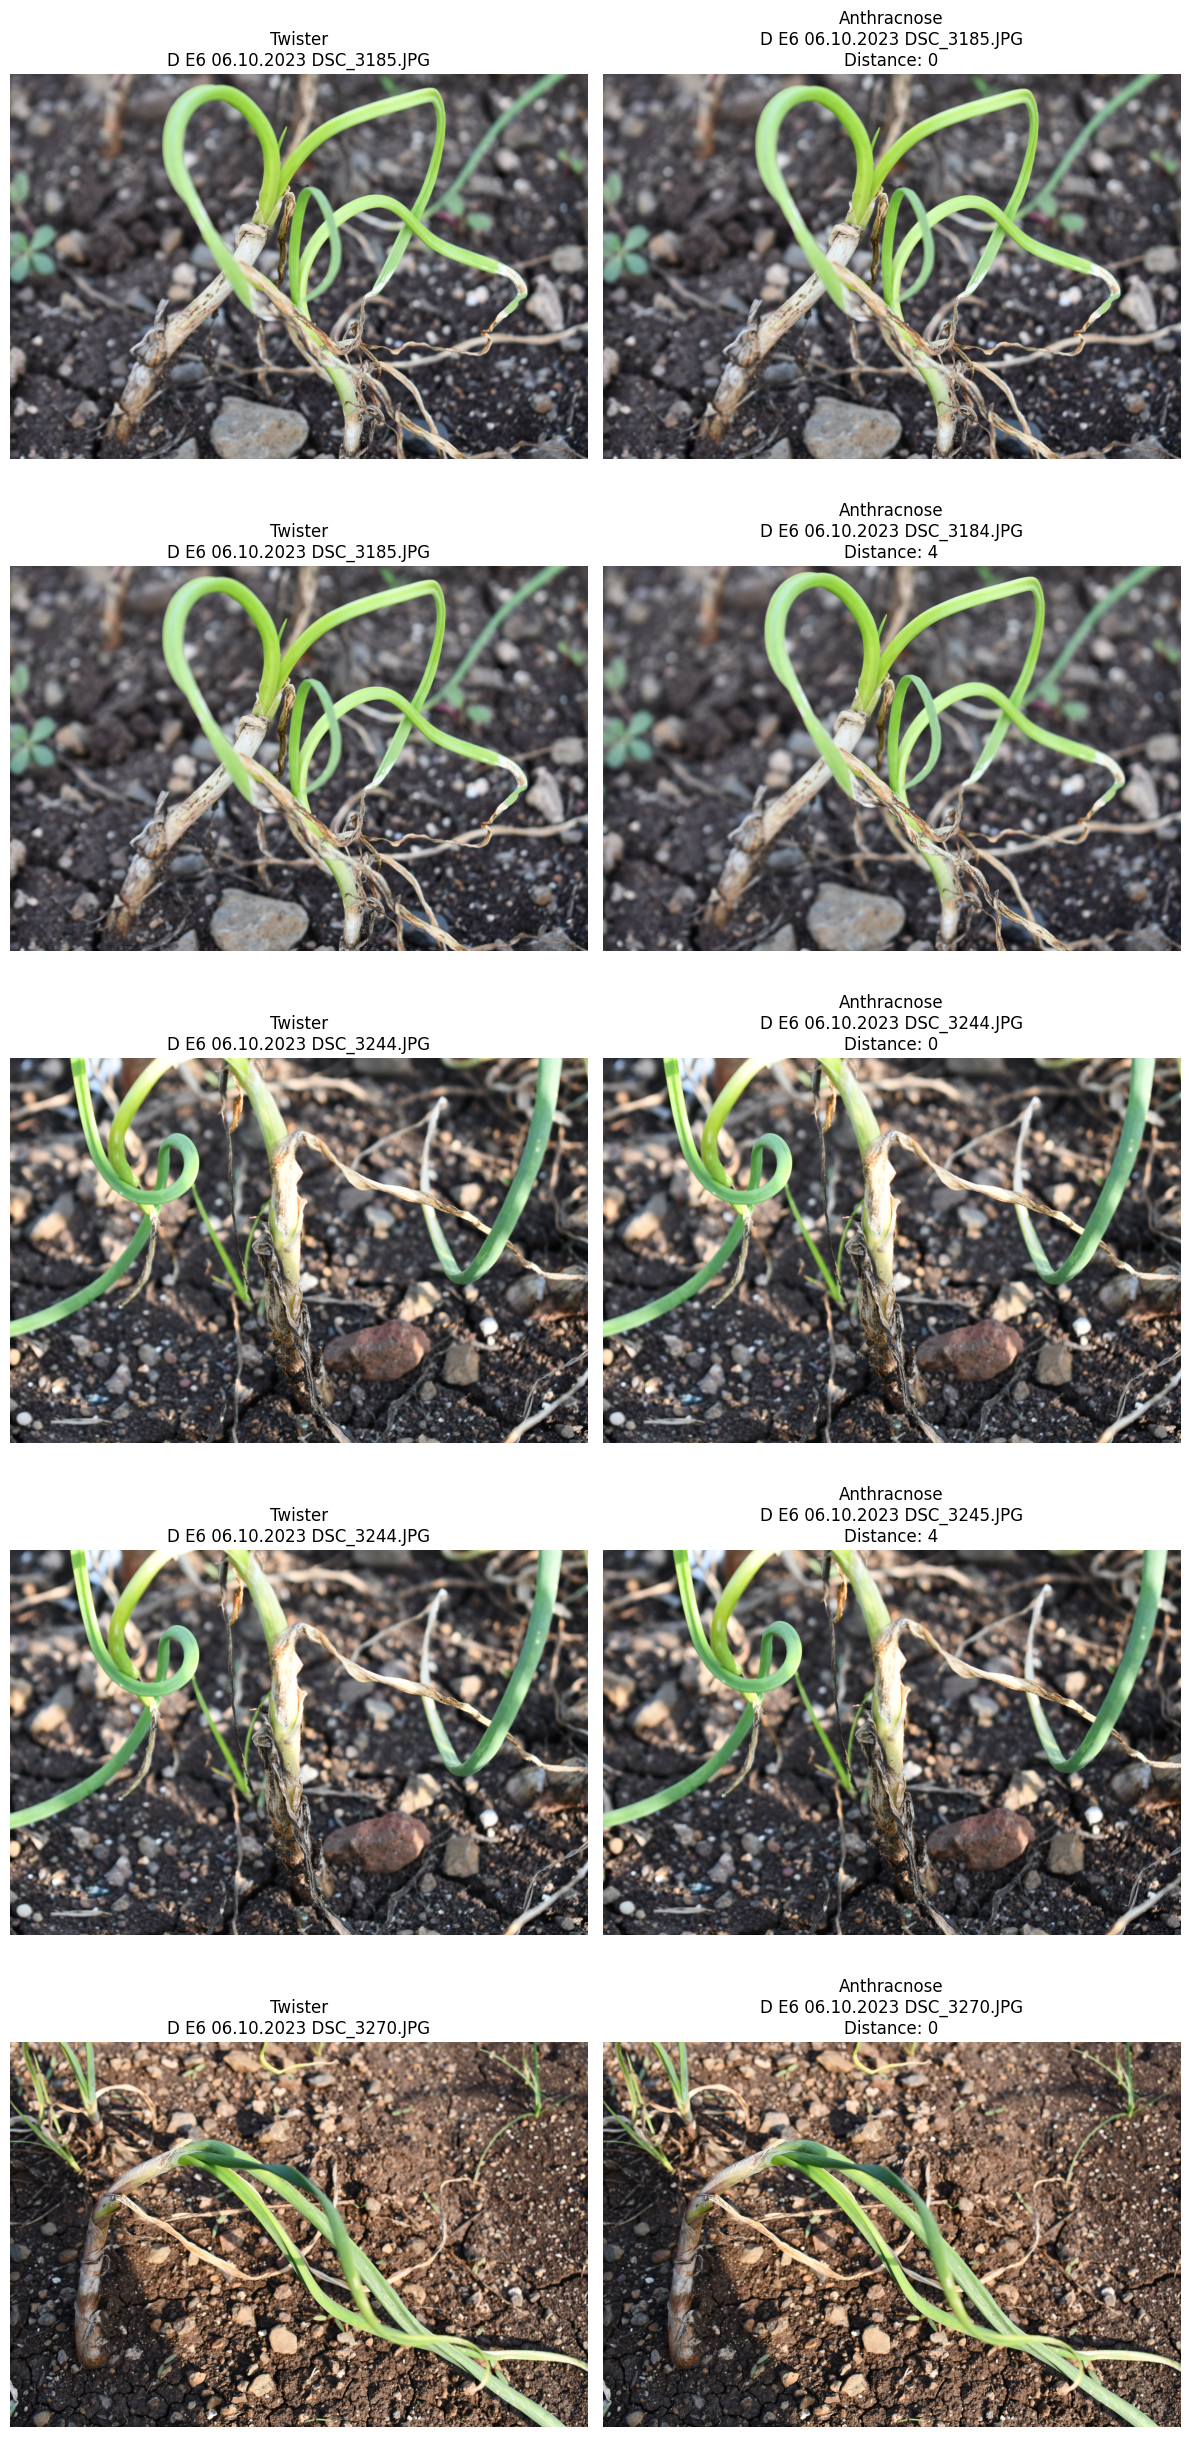

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_image_pairs(matches, num_pairs=20):

    num_pairs = min(num_pairs, len(matches))
    plt.figure(figsize=(12, 5 * num_pairs))
    
    for i in range(num_pairs):
        twister_path, anthracnose_path, dist = matches[i]
        
        img1 = Image.open(twister_path)
        img2 = Image.open(anthracnose_path)
        
        plt.subplot(num_pairs, 2, 2*i + 1)
        plt.imshow(img1)
        plt.title(f"Twister\n{twister_path.split('/')[-1]}")
        plt.axis('off')
        
        plt.subplot(num_pairs, 2, 2*i + 2)
        plt.imshow(img2)
        plt.title(f"Anthracnose\n{anthracnose_path.split('/')[-1]}\nDistance: {dist}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_image_pairs(matches, num_pairs=5)


In [ ]:
def count_same_filenames(matches):
    count = 0
    same_name_pairs = []
    for twister_path, anthracnose_path, dist in matches:
        twister_name = twister_path.split('/')[-1]
        anthracnose_name = anthracnose_path.split('/')[-1]
        if twister_name == anthracnose_name:
            count += 1
            same_name_pairs.append((twister_path, anthracnose_path))
    return count, same_name_pairs

same_name_count, same_name_pairs = count_same_filenames(matches)
print(f"Number of image pairs with the same filename: {same_name_count}")



Number of image pairs with the same filename: 193
Pair 1:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3185.JPG
Pair 2:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3244.JPG
Pair 3:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/D E6 06.10.2023 DSC_3270.JPG
Pair 4:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg
  Anthracnose: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Anthracnose/S E6 06.10.2023 IMG_20231006_163321~2.jpg
Pair 5:
  Twister: /raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 I

In [ ]:
def count_same_filenames(matches):
    count = 0
    same_name_pairs = []
    for twister_path, anthracnose_path, dist in matches:
        twister_name = twister_path.split('/')[-1]
        anthracnose_name = anthracnose_path.split('/')[-1]
        if twister_name == anthracnose_name:
            count += 1
            same_name_pairs.append((twister_path, anthracnose_path))
    return count, same_name_pairs

same_name_count, same_name_pairs = count_same_filenames(matches)
print(f"Number of image pairs with the same filename: {same_name_count}")



In [39]:

target_classes = ['Anthracnose', 'Healthy', 'Purple_Blotch', 'Stemphylium', 'Twister']

filtered_dict = {cls: jpg_paths_dict[cls] for cls in target_classes if cls in jpg_paths_dict}


In [40]:
filtered_dict.keys()

dict_keys(['Anthracnose', 'Healthy', 'Purple_Blotch', 'Stemphylium', 'Twister'])

In [41]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [42]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, num_classes, class_names):
    cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix (Proportions)')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1)  
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45) 
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()  
    plt.show()

In [48]:
jpg_paths_comb_dict = filtered_dict 

In [49]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Anthracnose
Number of JPEG files: 765

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Twister
Number of JPEG files: 317



In [ ]:
import random
target_count = 317

balanced_dict = {}
for cls, file_list in jpg_paths_comb_dict.items():
    if len(file_list) > target_count:
        balanced_dict[cls] = random.sample(file_list, target_count)
    else:
        balanced_dict[cls] = file_list 

for cls in balanced_dict:
    print(f"{cls}: {len(balanced_dict[cls])} images")


Anthracnose: 317 images
Healthy: 317 images
Purple_Blotch: 317 images
Stemphylium: 317 images
Twister: 317 images


In [52]:
jpg_paths_comb_dict = balanced_dict

In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))  
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


## New

In [ ]:
from PIL import Image
import numpy as np
import cv2

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8) 

        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
        
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_loss(pred, y_a, y_b, lam, criterion):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


In [ ]:
class DenseNet121WithCBAM(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base = models.densenet121(pretrained=True)
        self.features = self.base.features
        
        self.cbam1 = CBAM(1024)
        self.cbam2 = CBAM(1024)
        
        self.classifier = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        features = self.features(x)
        features = self.cbam1(features)
        features = F.relu(features)
        features = self.cbam2(features)
        out = F.adaptive_avg_pool2d(features, (1, 1))
        out = torch.flatten(out, 1)
        return self.classifier(out)


In [ ]:
class CBAM(nn.Module):
    def __init__(self, channels, reduction_ratio=16):
        super().__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels//reduction_ratio, 1),
            nn.ReLU(),
            nn.Conv2d(channels//reduction_ratio, channels, 1),
            nn.Sigmoid()
        )
        
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(channels, 1, 7, padding=3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        channel = self.channel_attention(x)
        x = x * channel
        spatial = self.spatial_attention(x)
        return x * spatial


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)


In [59]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=64)

In [60]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[317, 317, 317, 317, 317]
tensor([1., 1., 1., 1., 1.], device='cuda:0')


In [61]:
def validate(model, val_loader, criterion):
    model.eval()
    val_running_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_corrects += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = val_corrects / val_total
    return val_loss, val_acc


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
def train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    scheduler = ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5, verbose=True)
    best_acc = 0.0
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = mixup_loss(outputs, targets_a, targets_b, lam, criterion)
            
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (lam * (predicted == targets_a).sum().item() + 
                        (1 - lam) * (predicted == targets_b).sum().item())
            
            running_loss += loss.item() * inputs.size(0)
        
        val_loss, val_acc = validate(model, val_loader, criterion)
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = corrects / total
        
        scheduler.step(val_acc)
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'densenet_cutmix_cbam_5_class_balanced.pth')
        
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Epoch {epoch+1}: '
              f'Train Loss: {running_loss/len(train_loader.dataset):.4f} '
              f'Train Acc: {corrects/total:.4f} '
              f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')
    
    return train_losses, train_accuracies, val_losses, val_accuracies, model


In [63]:

model = DenseNet121WithCBAM(num_classes=len(jpg_paths_comb_dict)).to(device)

In [64]:
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

train_losses, train_accuracies, val_losses, val_accuracies, model = train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1: Train Loss: 1.1717 Train Acc: 0.5325 Val Loss: 3.8696 Val Acc: 0.3281


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2: Train Loss: 1.0249 Train Acc: 0.6049 Val Loss: 0.8593 Val Acc: 0.6151


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3: Train Loss: 0.9104 Train Acc: 0.6676 Val Loss: 1.1579 Val Acc: 0.5647


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4: Train Loss: 0.7612 Train Acc: 0.7283 Val Loss: 0.8102 Val Acc: 0.6782


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5: Train Loss: 0.8873 Train Acc: 0.6992 Val Loss: 0.8527 Val Acc: 0.6498


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6: Train Loss: 0.7536 Train Acc: 0.7423 Val Loss: 0.9191 Val Acc: 0.6404


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7: Train Loss: 0.8313 Train Acc: 0.7168 Val Loss: 0.8179 Val Acc: 0.6940


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8: Train Loss: 0.8081 Train Acc: 0.7150 Val Loss: 0.6751 Val Acc: 0.7066


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9: Train Loss: 0.6143 Train Acc: 0.8060 Val Loss: 0.7043 Val Acc: 0.7603


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10: Train Loss: 0.5900 Train Acc: 0.8200 Val Loss: 0.7702 Val Acc: 0.6940


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11: Train Loss: 0.7617 Train Acc: 0.7440 Val Loss: 0.8864 Val Acc: 0.7066


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12: Train Loss: 0.6588 Train Acc: 0.7912 Val Loss: 0.9604 Val Acc: 0.6625


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00013: reducing learning rate of group 0 to 5.0000e-04.
Epoch 13: Train Loss: 0.6134 Train Acc: 0.8221 Val Loss: 0.8803 Val Acc: 0.6972


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14: Train Loss: 0.5805 Train Acc: 0.8313 Val Loss: 0.7057 Val Acc: 0.7729


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15: Train Loss: 0.5697 Train Acc: 0.8265 Val Loss: 0.6858 Val Acc: 0.7666


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16: Train Loss: 0.5766 Train Acc: 0.8276 Val Loss: 0.6401 Val Acc: 0.7634


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17: Train Loss: 0.5915 Train Acc: 0.8271 Val Loss: 0.6588 Val Acc: 0.7571


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00018: reducing learning rate of group 0 to 2.5000e-04.
Epoch 18: Train Loss: 0.6308 Train Acc: 0.8091 Val Loss: 0.6948 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19: Train Loss: 0.5414 Train Acc: 0.8365 Val Loss: 0.7139 Val Acc: 0.7256


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20: Train Loss: 0.5636 Train Acc: 0.8339 Val Loss: 0.6792 Val Acc: 0.7634


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21: Train Loss: 0.5318 Train Acc: 0.8276 Val Loss: 0.6772 Val Acc: 0.7445


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00022: reducing learning rate of group 0 to 1.2500e-04.
Epoch 22: Train Loss: 0.5574 Train Acc: 0.8272 Val Loss: 0.6681 Val Acc: 0.7476


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23: Train Loss: 0.5832 Train Acc: 0.8158 Val Loss: 0.6770 Val Acc: 0.7476


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 24: Train Loss: 0.5154 Train Acc: 0.8282 Val Loss: 0.7015 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25: Train Loss: 0.4690 Train Acc: 0.8661 Val Loss: 0.7081 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00026: reducing learning rate of group 0 to 6.2500e-05.
Epoch 26: Train Loss: 0.4821 Train Acc: 0.8446 Val Loss: 0.7084 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27: Train Loss: 0.4508 Train Acc: 0.8666 Val Loss: 0.7091 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 28: Train Loss: 0.4624 Train Acc: 0.8699 Val Loss: 0.7054 Val Acc: 0.7476


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29: Train Loss: 0.4754 Train Acc: 0.8604 Val Loss: 0.7145 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00030: reducing learning rate of group 0 to 3.1250e-05.
Epoch 30: Train Loss: 0.5375 Train Acc: 0.8358 Val Loss: 0.7157 Val Acc: 0.7445


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 31: Train Loss: 0.5607 Train Acc: 0.8247 Val Loss: 0.7087 Val Acc: 0.7476


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 32: Train Loss: 0.4733 Train Acc: 0.8545 Val Loss: 0.7042 Val Acc: 0.7539


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 33: Train Loss: 0.5514 Train Acc: 0.8208 Val Loss: 0.7153 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00034: reducing learning rate of group 0 to 1.5625e-05.
Epoch 34: Train Loss: 0.4807 Train Acc: 0.8575 Val Loss: 0.7219 Val Acc: 0.7508


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 35: Train Loss: 0.4776 Train Acc: 0.8563 Val Loss: 0.7235 Val Acc: 0.7476


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 36: Train Loss: 0.5838 Train Acc: 0.8222 Val Loss: 0.7296 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 37: Train Loss: 0.5115 Train Acc: 0.8494 Val Loss: 0.7340 Val Acc: 0.7350


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00038: reducing learning rate of group 0 to 7.8125e-06.
Epoch 38: Train Loss: 0.5347 Train Acc: 0.8194 Val Loss: 0.7389 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 39: Train Loss: 0.4422 Train Acc: 0.8728 Val Loss: 0.7274 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 40: Train Loss: 0.4835 Train Acc: 0.8586 Val Loss: 0.7310 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 41: Train Loss: 0.3123 Train Acc: 0.9209 Val Loss: 0.7312 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00042: reducing learning rate of group 0 to 3.9063e-06.
Epoch 42: Train Loss: 0.4407 Train Acc: 0.8698 Val Loss: 0.7311 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 43: Train Loss: 0.3549 Train Acc: 0.9006 Val Loss: 0.7318 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 44: Train Loss: 0.3548 Train Acc: 0.9174 Val Loss: 0.7306 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 45: Train Loss: 0.3557 Train Acc: 0.9154 Val Loss: 0.7315 Val Acc: 0.7413


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00046: reducing learning rate of group 0 to 1.9531e-06.
Epoch 46: Train Loss: 0.6016 Train Acc: 0.8166 Val Loss: 0.7373 Val Acc: 0.7350


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 47: Train Loss: 0.4576 Train Acc: 0.8651 Val Loss: 0.7351 Val Acc: 0.7350


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 48: Train Loss: 0.5859 Train Acc: 0.7895 Val Loss: 0.7409 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 49: Train Loss: 0.5285 Train Acc: 0.8463 Val Loss: 0.7377 Val Acc: 0.7382


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00050: reducing learning rate of group 0 to 9.7656e-07.
Epoch 50: Train Loss: 0.4832 Train Acc: 0.8612 Val Loss: 0.7373 Val Acc: 0.7382


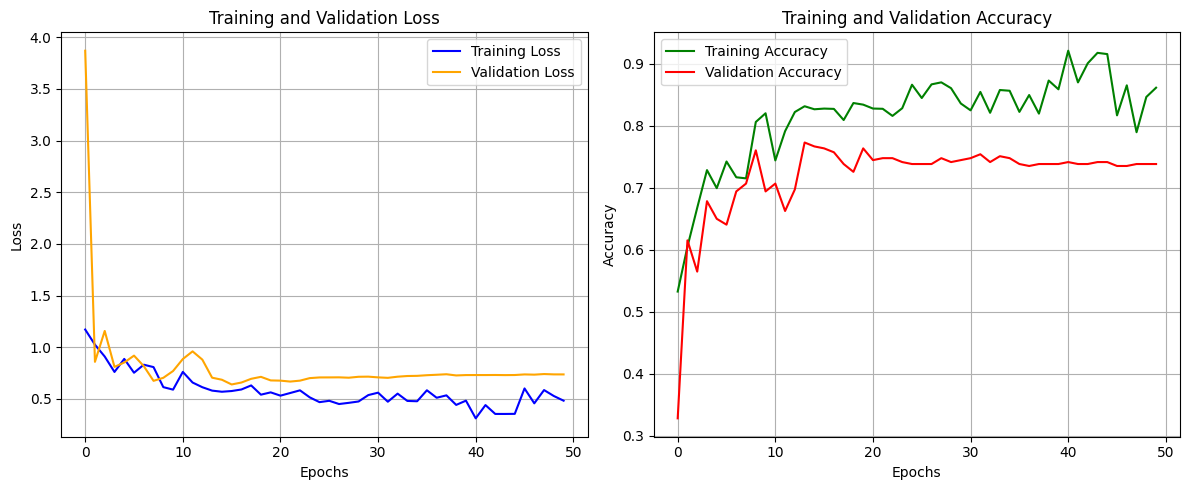

In [65]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [66]:
model.load_state_dict(torch.load('densenet_cutmix_cbam_5_class_balanced.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

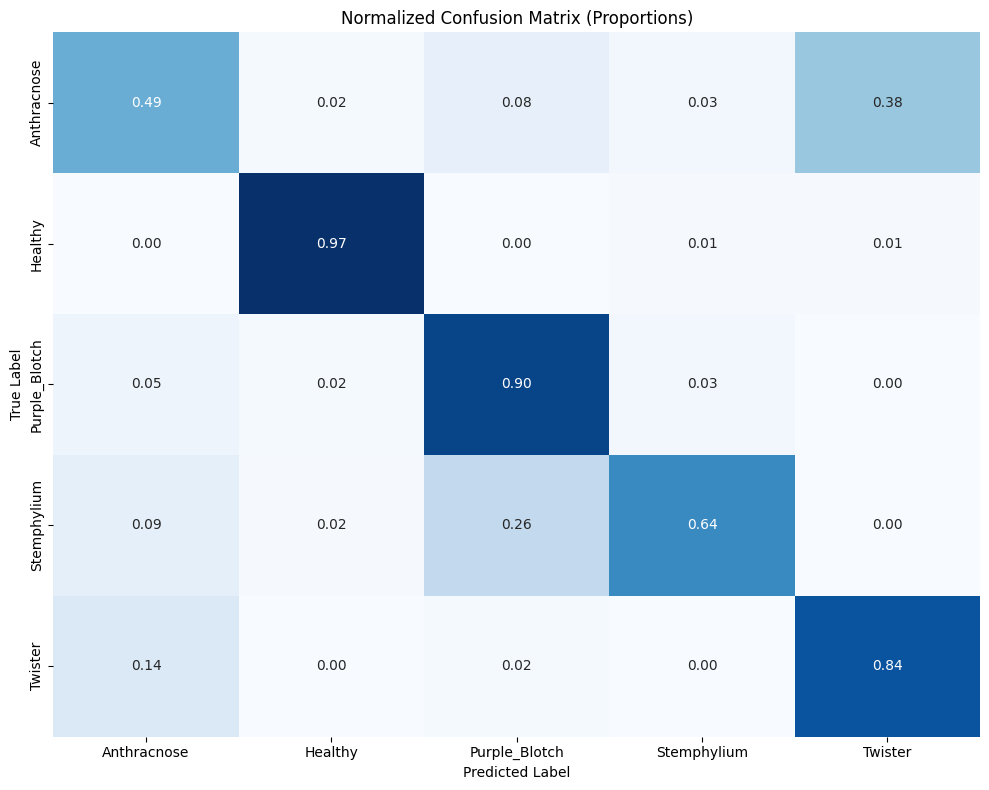

Total Accuracy: 77.29%
Class 'Anthracnose' Accuracy: 49.18%
Class 'Healthy' Accuracy: 97.26%
Class 'Purple_Blotch' Accuracy: 90.00%
Class 'Stemphylium' Accuracy: 63.64%
Class 'Twister' Accuracy: 84.21%


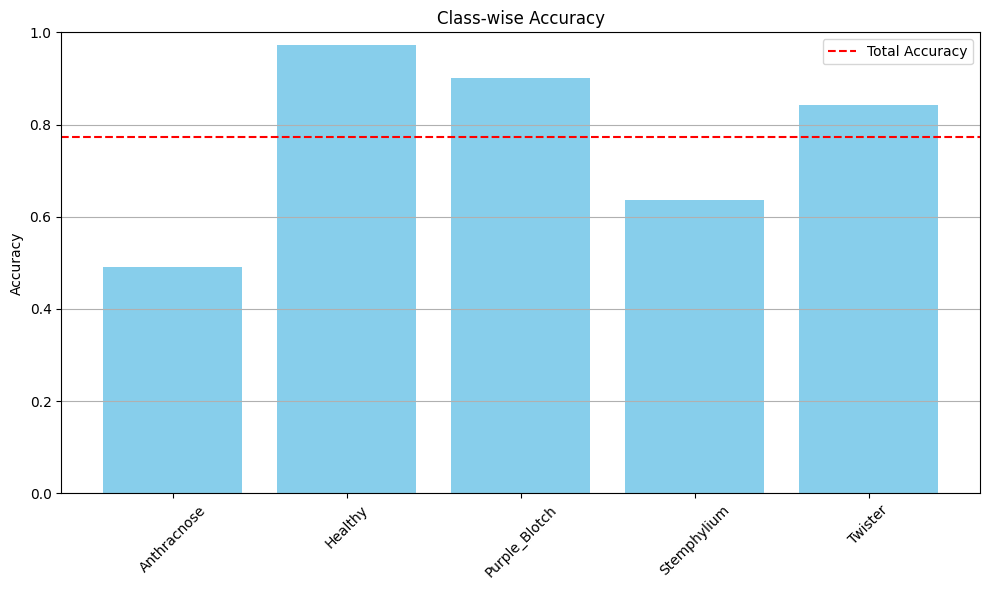

In [67]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)

In [31]:
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

train_losses, train_accuracies, val_losses, val_accuracies, model = train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1: Train Loss: 1.1726 Train Acc: 0.5589 Val Loss: 1.0101 Val Acc: 0.6202


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2: Train Loss: 1.0299 Train Acc: 0.6322 Val Loss: 0.8675 Val Acc: 0.7256


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3: Train Loss: 0.9572 Train Acc: 0.6698 Val Loss: 0.8486 Val Acc: 0.6698


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4: Train Loss: 0.8734 Train Acc: 0.7018 Val Loss: 0.7876 Val Acc: 0.7318


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5: Train Loss: 0.8996 Train Acc: 0.6922 Val Loss: 0.6828 Val Acc: 0.7581


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6: Train Loss: 0.7286 Train Acc: 0.7629 Val Loss: 0.6986 Val Acc: 0.7426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7: Train Loss: 0.7332 Train Acc: 0.7644 Val Loss: 0.6917 Val Acc: 0.7163


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8: Train Loss: 0.7993 Train Acc: 0.7366 Val Loss: 0.9422 Val Acc: 0.7194


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9: Train Loss: 0.7320 Train Acc: 0.7683 Val Loss: 0.5960 Val Acc: 0.7659


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10: Train Loss: 0.6859 Train Acc: 0.7833 Val Loss: 0.6223 Val Acc: 0.7612


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11: Train Loss: 0.7152 Train Acc: 0.7766 Val Loss: 0.6227 Val Acc: 0.7550


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12: Train Loss: 0.6772 Train Acc: 0.7862 Val Loss: 0.6333 Val Acc: 0.7938


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13: Train Loss: 0.6045 Train Acc: 0.8105 Val Loss: 0.6884 Val Acc: 0.7612


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14: Train Loss: 0.6216 Train Acc: 0.8045 Val Loss: 0.5891 Val Acc: 0.8109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15: Train Loss: 0.6535 Train Acc: 0.7891 Val Loss: 0.6329 Val Acc: 0.7969


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16: Train Loss: 0.6486 Train Acc: 0.7957 Val Loss: 0.5581 Val Acc: 0.8000


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17: Train Loss: 0.6273 Train Acc: 0.8135 Val Loss: 0.5878 Val Acc: 0.8062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00018: reducing learning rate of group 0 to 5.0000e-04.
Epoch 18: Train Loss: 0.6643 Train Acc: 0.7995 Val Loss: 0.6592 Val Acc: 0.8093


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19: Train Loss: 0.5568 Train Acc: 0.8297 Val Loss: 0.5942 Val Acc: 0.8171


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20: Train Loss: 0.4842 Train Acc: 0.8584 Val Loss: 0.6251 Val Acc: 0.8279


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21: Train Loss: 0.6146 Train Acc: 0.8050 Val Loss: 0.6053 Val Acc: 0.8264


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 22: Train Loss: 0.5620 Train Acc: 0.8280 Val Loss: 0.6680 Val Acc: 0.8186


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23: Train Loss: 0.5570 Train Acc: 0.8237 Val Loss: 0.6032 Val Acc: 0.8078


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00024: reducing learning rate of group 0 to 2.5000e-04.
Epoch 24: Train Loss: 0.5429 Train Acc: 0.8303 Val Loss: 0.5361 Val Acc: 0.8264


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25: Train Loss: 0.5291 Train Acc: 0.8343 Val Loss: 0.5882 Val Acc: 0.8202


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 26: Train Loss: 0.4939 Train Acc: 0.8467 Val Loss: 0.5675 Val Acc: 0.8217


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27: Train Loss: 0.5807 Train Acc: 0.8101 Val Loss: 0.6156 Val Acc: 0.8186


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00028: reducing learning rate of group 0 to 1.2500e-04.
Epoch 28: Train Loss: 0.5248 Train Acc: 0.8296 Val Loss: 0.6095 Val Acc: 0.8217


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29: Train Loss: 0.5226 Train Acc: 0.8242 Val Loss: 0.5742 Val Acc: 0.8093


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 30: Train Loss: 0.5067 Train Acc: 0.8329 Val Loss: 0.6438 Val Acc: 0.8124


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 31: Train Loss: 0.4621 Train Acc: 0.8563 Val Loss: 0.6712 Val Acc: 0.8062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00032: reducing learning rate of group 0 to 6.2500e-05.
Epoch 32: Train Loss: 0.5507 Train Acc: 0.8193 Val Loss: 0.6346 Val Acc: 0.8124


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 33: Train Loss: 0.4208 Train Acc: 0.8730 Val Loss: 0.6505 Val Acc: 0.8124


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 34: Train Loss: 0.4335 Train Acc: 0.8607 Val Loss: 0.6615 Val Acc: 0.8093


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 35: Train Loss: 0.5019 Train Acc: 0.8408 Val Loss: 0.6946 Val Acc: 0.8078


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00036: reducing learning rate of group 0 to 3.1250e-05.
Epoch 36: Train Loss: 0.4673 Train Acc: 0.8425 Val Loss: 0.6778 Val Acc: 0.8109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 37: Train Loss: 0.4919 Train Acc: 0.8435 Val Loss: 0.6757 Val Acc: 0.8078


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 38: Train Loss: 0.5117 Train Acc: 0.8405 Val Loss: 0.6634 Val Acc: 0.8093


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 39: Train Loss: 0.5269 Train Acc: 0.8275 Val Loss: 0.6367 Val Acc: 0.8093


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00040: reducing learning rate of group 0 to 1.5625e-05.
Epoch 40: Train Loss: 0.4607 Train Acc: 0.8514 Val Loss: 0.6582 Val Acc: 0.8047


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 41: Train Loss: 0.4562 Train Acc: 0.8676 Val Loss: 0.6702 Val Acc: 0.8000


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 42: Train Loss: 0.4986 Train Acc: 0.8415 Val Loss: 0.6635 Val Acc: 0.8000


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 43: Train Loss: 0.4533 Train Acc: 0.8568 Val Loss: 0.6784 Val Acc: 0.8016


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00044: reducing learning rate of group 0 to 7.8125e-06.
Epoch 44: Train Loss: 0.5113 Train Acc: 0.8310 Val Loss: 0.6559 Val Acc: 0.8031


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 45: Train Loss: 0.4853 Train Acc: 0.8378 Val Loss: 0.6852 Val Acc: 0.8047


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 46: Train Loss: 0.4045 Train Acc: 0.8742 Val Loss: 0.6564 Val Acc: 0.8078


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 47: Train Loss: 0.4740 Train Acc: 0.8490 Val Loss: 0.6818 Val Acc: 0.8047


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 00048: reducing learning rate of group 0 to 3.9063e-06.
Epoch 48: Train Loss: 0.4188 Train Acc: 0.8703 Val Loss: 0.6797 Val Acc: 0.8062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 49: Train Loss: 0.4602 Train Acc: 0.8538 Val Loss: 0.6707 Val Acc: 0.8047


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 50: Train Loss: 0.4601 Train Acc: 0.8537 Val Loss: 0.6782 Val Acc: 0.8016


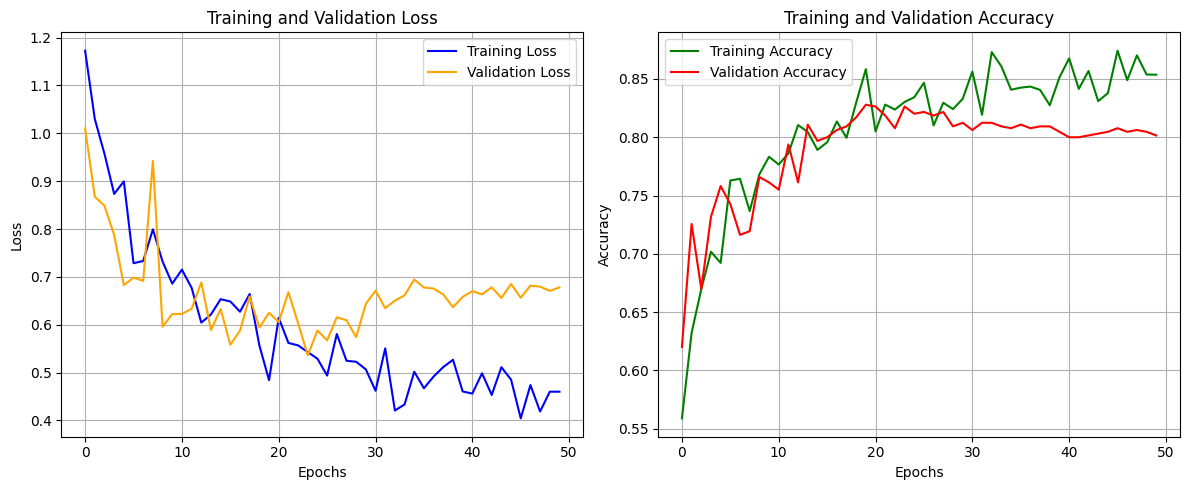

In [32]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [34]:
model.load_state_dict(torch.load('densenet_cutmix_cbam_5_class.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

Corrupt JPEG data: premature end of data segment


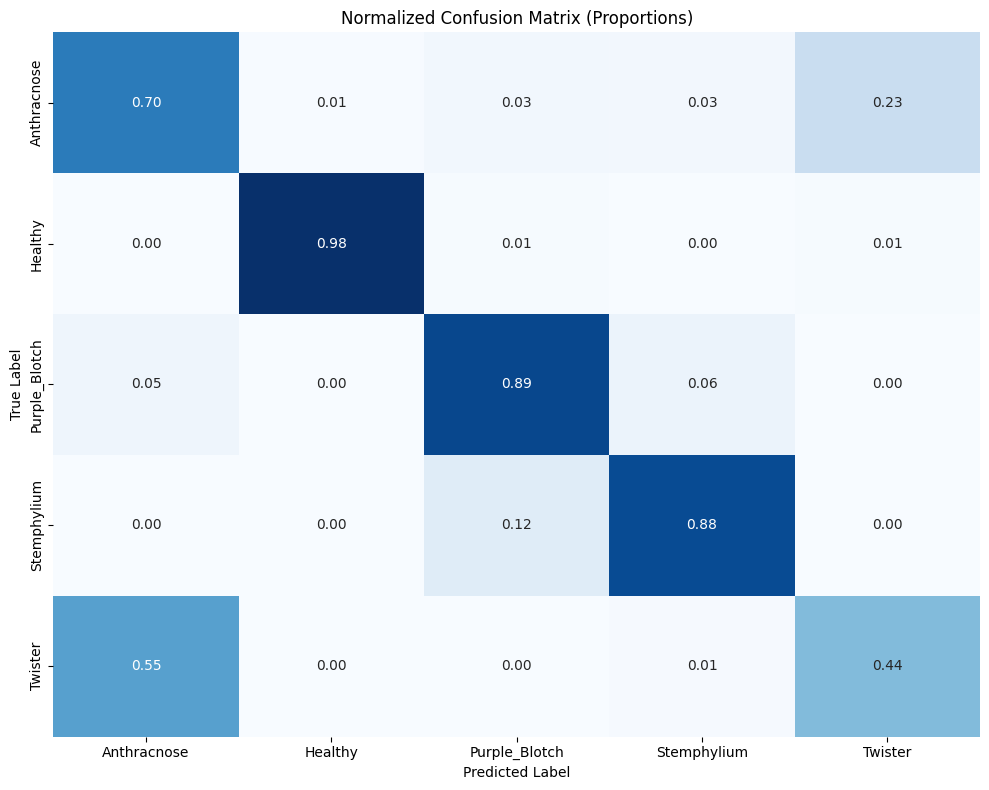

Total Accuracy: 82.79%
Class 'Anthracnose' Accuracy: 70.07%
Class 'Healthy' Accuracy: 98.21%
Class 'Purple_Blotch' Accuracy: 89.41%
Class 'Stemphylium' Accuracy: 88.14%
Class 'Twister' Accuracy: 43.66%


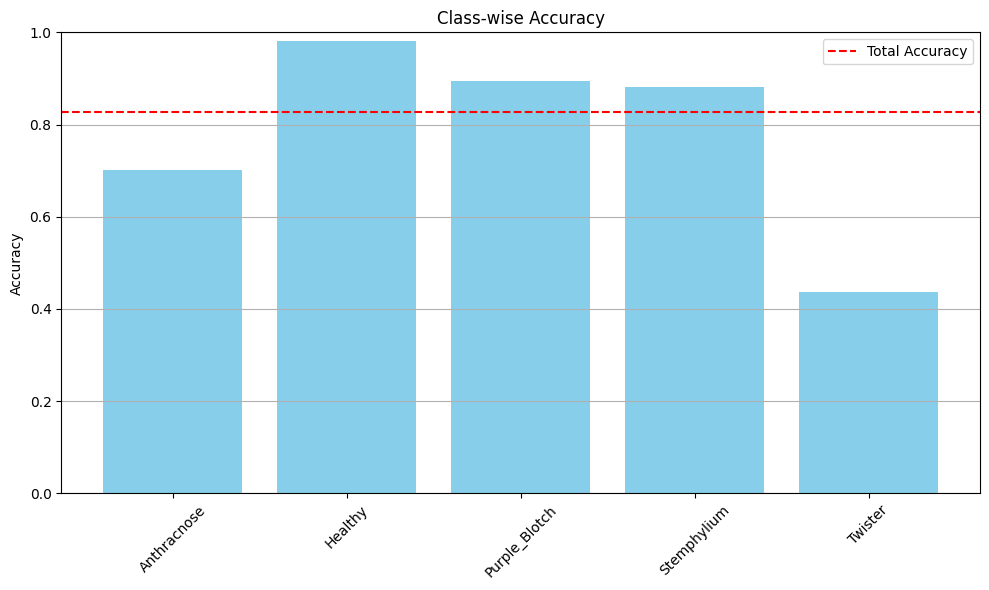

In [35]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)